### Inverse Laplace transform performed in AstroGK manual by comparing with solution from Bromwich integral

In [6]:
import numpy as np
from scipy.special import i0e, i1e
import scipy.optimize
from util import real_imag, list2complex, zp
import matplotlib.pyplot as plt
%matplotlib inline

## Term $D$ and $G$ as defined in the companion pdf file

### Eq. 16 and Eq. 24

In [44]:
def G(ti_te, mi_me, bi, kperp_rhoi, wbar, wbar_0):
    """
    Calculate
    A  = sum_s [ (Ti/Ts) (1 + Gamma_0s xi_s Z_s) ]
    """
    alpha_i = kperp_rhoi**2 / 2
    alpha_e = alpha_i / ti_te / mi_me
    xi_i = wbar / np.sqrt(bi)
    xi_e = wbar * np.sqrt(ti_te / mi_me / bi)
    Z_i = zp(xi_i)
    Z_e = zp(xi_e)
    Gamma_1i = i0e(alpha_i) - i1e(alpha_i)
    Gamma_1e = i0e(alpha_e) - i1e(alpha_e)
    
    term_i = Gamma_1i * 1/np.sqrt(bi) * ((1-2*xi_i**2) * Z_i - 2*xi_i)
    term_e = Gamma_1e * 1/np.sqrt(bi * ti_te * mi_me) * ((1-2*xi_e**2)*Z_e - 2*xi_e)
    return (term_i + term_e) * (wbar - wbar_0)

In [45]:
def dispersion(ti_te, mi_me, bi, kperp_rhoi, w_bar):
    """
    normalized dispersion relation:
    D = -1/bi + sum_s (Ts/Ti) Gamma_1s xi_s Z_s 

    """
    alpha_i = kperp_rhoi**2 / 2
    alpha_e = alpha_i / ti_te / mi_me
    xi_i = w_bar / np.sqrt(bi)
    xi_e = w_bar * np.sqrt(ti_te / mi_me / bi)
    Z_i = zp(xi_i)
    Z_e = zp(xi_e)
    Gamma_1i = i0e(alpha_i) - i1e(alpha_i)
    Gamma_1e = i0e(alpha_e) - i1e(alpha_e)
    
    return -1/bi + Gamma_1i * xi_i * Z_i + 1/ti_te * Gamma_1e * xi_e * Z_e

## fix dimensionless parameters 
$T_i/T_e, k_\perp \rho_i, \omega_0, \beta_i, A_{\parallel 0}$

In [54]:
ti_te = 1.
kperp_rhoi = 0.1
wbar_0 = 0.1
bi = 0.01
Apar0 = 10
mi_me = 1836

## solve for slow/entropy  mode roots $\bar{\omega}_1$

In [55]:
f = lambda w_bar: real_imag(dispersion(ti_te, mi_me, bi, kperp_rhoi, list2complex(w_bar)))

In [56]:
guess_1 = -0.15j
res = scipy.optimize.fsolve(f, real_imag(guess_1))
wbar_1 = list2complex(res)
print(wbar_1)

(1.212206073e-18-0.168351338763j)


### slow/entropy mode is non-propagating in this case

In [57]:
wbar_1 = 1j * wbar_1.imag
print(wbar_1)

(-0-0.16835133876275843j)


## Construct solution $\delta B_{\parallel \mathbf{k}}(t)$

In [58]:
G(ti_te, mi_me, bi, kperp_rhoi, wbar_1, wbar_0) * (wbar_1 - wbar_0)

(-134.41200044027337-73.222114503194675j)

$$
A_{\parallel \mathbf{k}}(t) = Res(\overline{\omega}_0) + Res(\overline{\omega}_1)
$$

In [27]:
def Apark(apark0, tbar):
    """
    
    """
    q2bar_w0 =  Q2bar(ti_te, mi_me, bi, kperp_rhoi, wbar_0)
    res_w0 = q2bar_w0 * np.exp(-1j * wbar_0 * tbar) / \
        (wbar_0**2 - q2bar_w0)
    G_w1 = G(ti_te, mi_me, bi, kperp_rhoi, wbar_1)
    G_w2 = G(ti_te, mi_me, bi, kperp_rhoi, wbar_2)
    res_w1 = wbar_1**2 * np.exp(-1j * wbar_1 * tbar) / \
        (G_w1 + 2 * wbar_1) / (wbar_1 - wbar_0)
    res_w2 = wbar_2**2 * np.exp(-1j * wbar_2 * tbar) / \
        (G_w2 + 2 * wbar_2) / (wbar_2 - wbar_0)
    return apark0 * (res_w0 + res_w1 + res_w2)


In [23]:
t_arr = np.linspace(0, 50, 500)

In [28]:
apar_arr = np.array([np.abs(Apark(10, tbar)) for tbar in t_arr])
apar_approx_arr = np.array([np.abs(Apark_approx(10, tbar)) for tbar in t_arr])

In [25]:
#

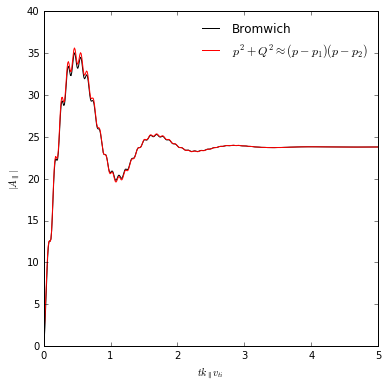

In [40]:
fig = plt.figure(figsize=[6,6])
plt.plot(t_arr * np.sqrt(bi), apar_arr, 'k', label='Bromwich')
plt.plot(t_arr * np.sqrt(bi), apar_approx_arr, 'r', label = r'$p^2+Q^2 \approx (p-p_1)(p-p_2)$')
plt.ylabel(r'$|A_\parallel|$')
plt.xlabel(r'$tk_\parallel v_{ti}$')
plt.legend(loc='best', frameon=False)
plt.show()

In [41]:
# fig.savefig('bromwich_vs_approx.eps')